In [1]:
!pip install --upgrade tensorflow keras scikit-learn opencv-python matplotlib keras_tuner keras_cv numpy

  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)


In [2]:
import tensorflow as tf
import keras

print(tf.__version__)
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

2024-09-22 18:09:52.205741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 18:09:52.227994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 18:09:52.234453: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 18:09:52.251216: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 18:09:53.352855: W tensorflow/comp

2.17.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


I0000 00:00:1727028594.387290    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028594.387580    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028594.447147    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028594.447442    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [4]:
from tensorflow.keras import backend as K

K.clear_session()

In [5]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

In [6]:
import tensorflow as tf
import keras
import pandas as pd
import os
import keras_cv
import matplotlib.pyplot as plt

/home/rob/.notebook/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
csv_file = 'ham10000_data/HAM10000_metadata.csv'
img_dir = 'ham10000_data/images'
file_ext = '.jpg'

df = pd.read_csv(csv_file)

image_paths = [
    os.path.join(img_dir, image_id + file_ext)
    for image_id in df['image_id']
]

print(f"Number of images: {len(image_paths)}")
print(f"First 5 image paths: {image_paths[:5]}")

classes = sorted(df['dx'].unique())
num_classes = len(classes)

print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

labels = df['dx'].map(lambda x: classes.index(x)).values
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

print(f"Class to Index Mapping: {class_to_idx}")
print(f"Labels: {labels}")

Number of images: 10015
First 5 image paths: ['ham10000_data/images/ISIC_0027419.jpg', 'ham10000_data/images/ISIC_0025030.jpg', 'ham10000_data/images/ISIC_0026769.jpg', 'ham10000_data/images/ISIC_0025661.jpg', 'ham10000_data/images/ISIC_0031633.jpg']
Number of classes: 7
Classes: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Class to Index Mapping: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Labels: [2 2 2 ... 0 0 4]


In [8]:
from IPython.display import display

display(df.head())

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [9]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

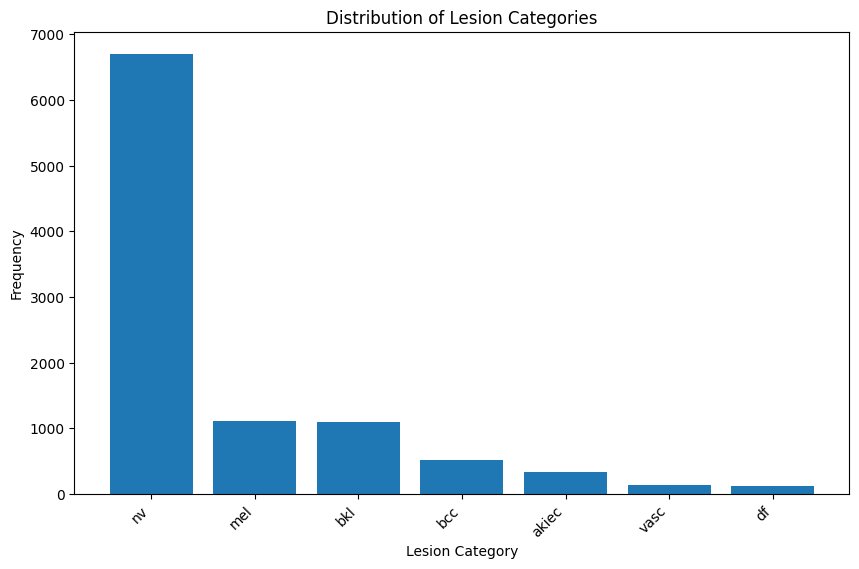

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
value_counts = df['dx'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.title('Distribution of Lesion Categories')
plt.xlabel('Lesion Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

I0000 00:00:1727028596.212129    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028596.212444    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028596.212650    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727028596.212853    8657 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

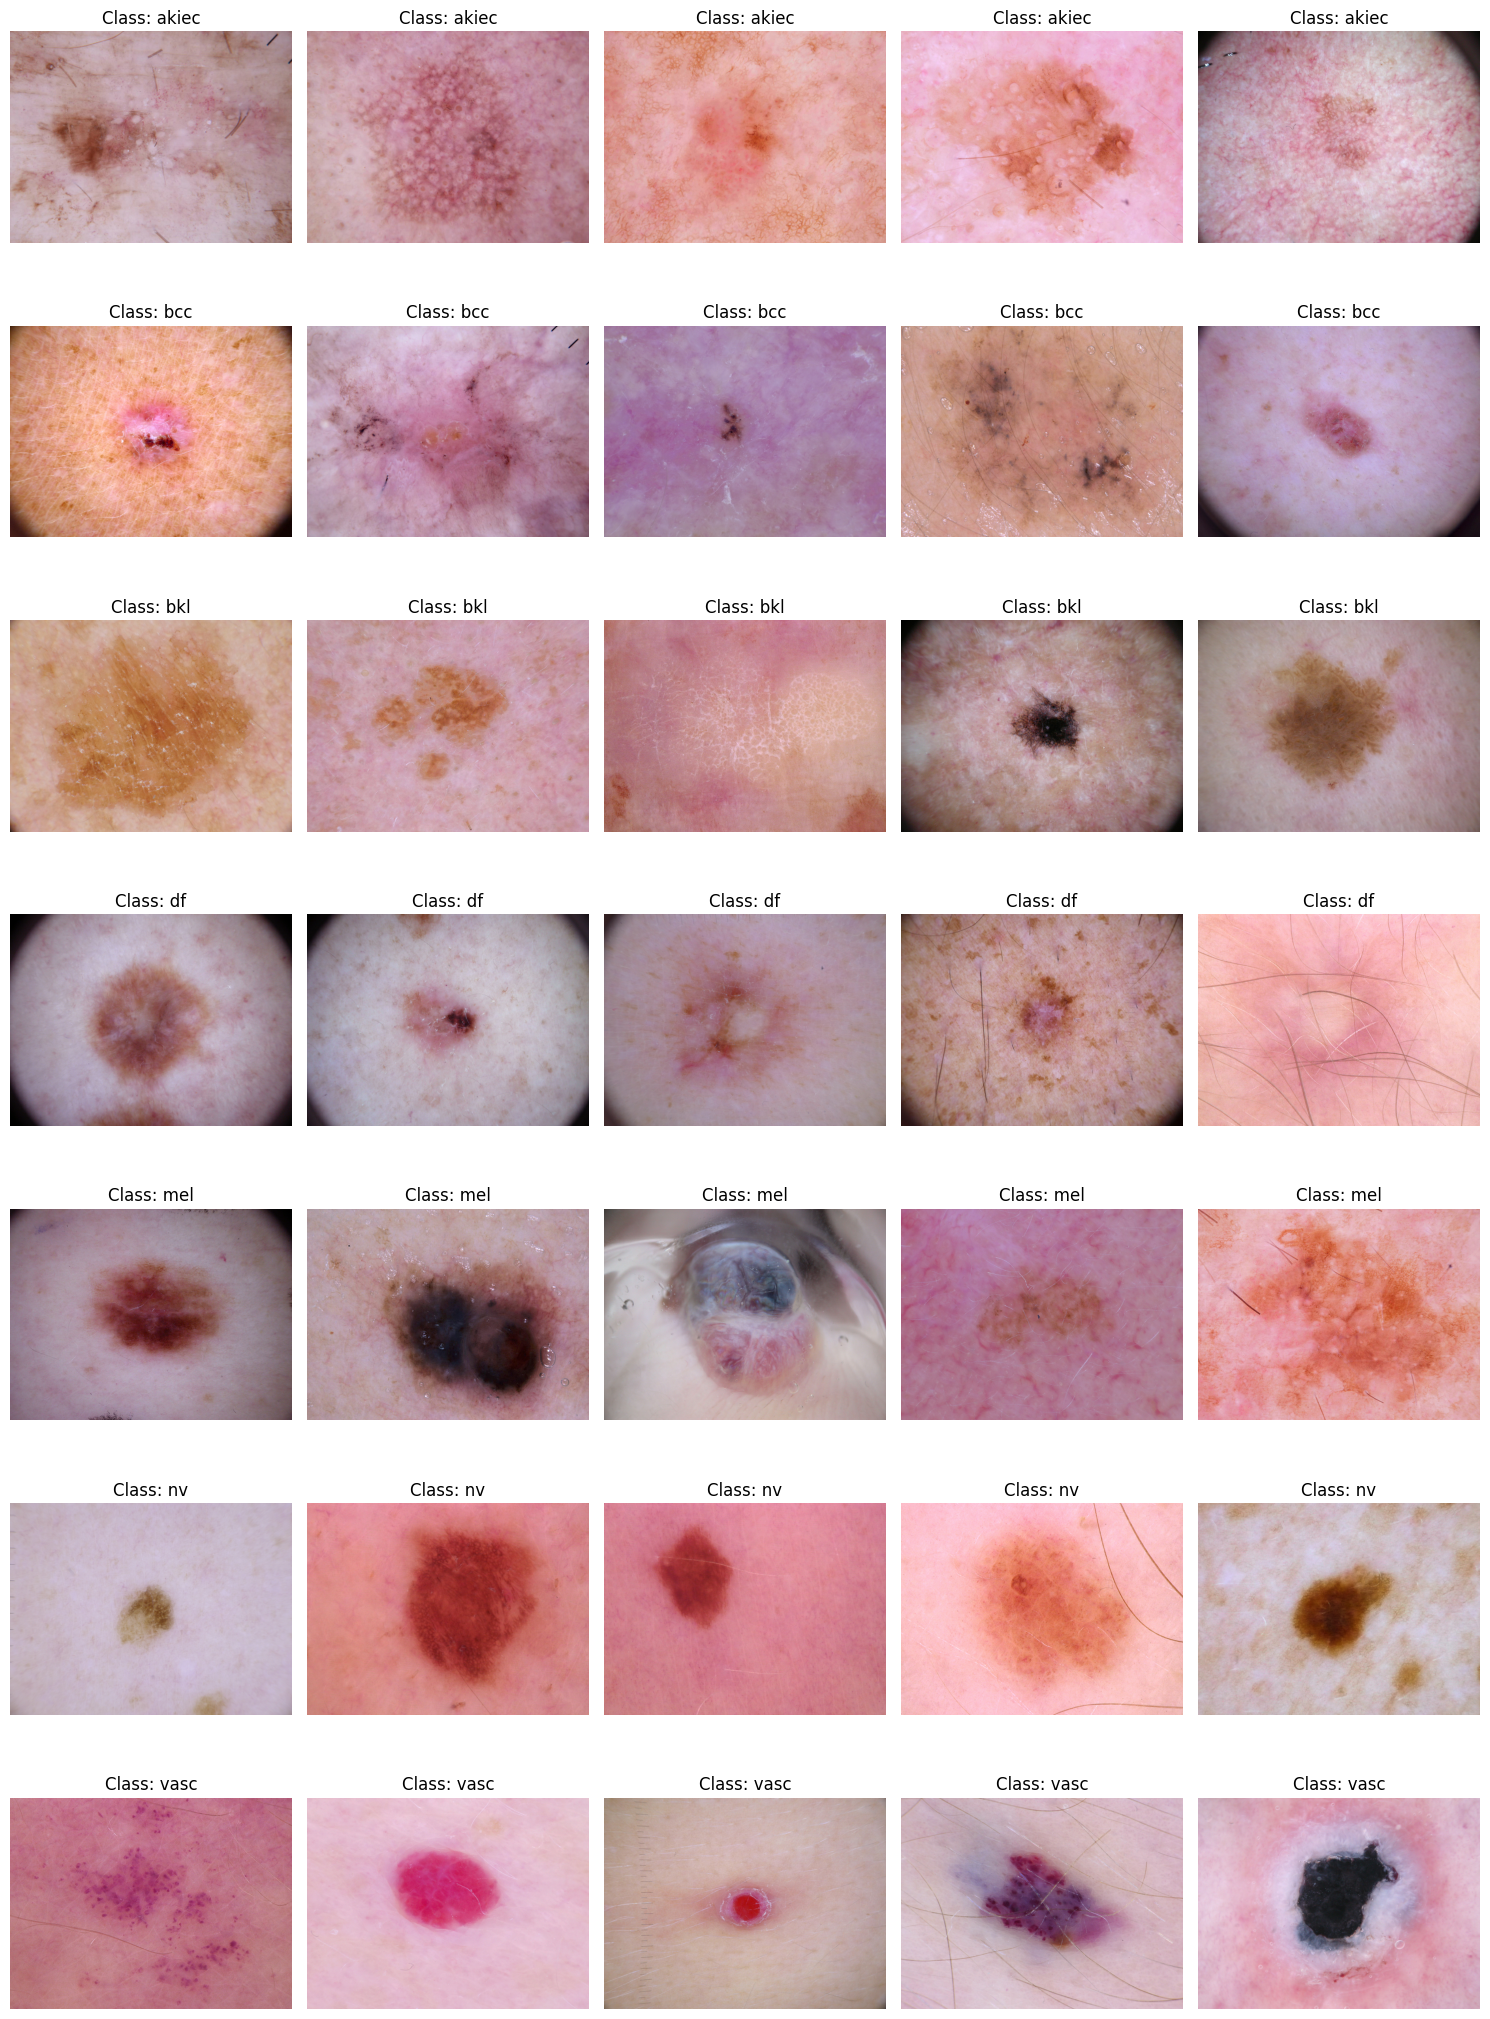

In [11]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf

n_samples_per_class = 5

plt.figure(figsize=(15, len(classes) * 3))

for class_index, class_name in enumerate(classes):
    class_indices = [i for i, label in enumerate(labels) if label == class_index]

    random_class_indices = random.sample(class_indices, min(n_samples_per_class, len(class_indices)))

    for i, idx in enumerate(random_class_indices):
        img_path = image_paths[idx]
        label = labels[idx]

        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Display image
        plt.subplot(len(classes), n_samples_per_class, class_index * n_samples_per_class + i + 1)
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:


def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # image = tf.image.resize(image, [224, 224])
    image = tf.image.resize_with_pad(image, 128, 128)

    # note ConvNeXt uses standard normalization
    image = tf.cast(image, tf.float32) / 255.0
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    image = (image - mean) / std

    return image, label


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

train_paths = []
train_labels = []
val_paths = []
val_labels = []

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in sss.split(image_paths, labels):
    train_paths = [image_paths[i] for i in train_index]
    train_labels = labels[train_index]
    val_paths = [image_paths[i] for i in val_index]
    val_labels = labels[val_index]

print(f"Training set size: {len(train_paths)}")
print(f"Validation set size: {len(val_paths)}")

train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

Training set size: 8012
Validation set size: 2003


In [14]:
batch_size = 4

train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()

val_dataset = val_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.cache()


In [15]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomContrast(0.1),
    keras.layers.RandomTranslation(0.1, 0.1),
])

In [16]:
import numpy as np

class_counts = np.bincount(train_labels)
total_counts = np.sum(class_counts)
class_prior = class_counts / total_counts


def build_model(hp):

    strategy = tf.distribute.MirroredStrategy()

    with strategy.scope():
        base_model = keras.applications.ConvNeXtTiny(
            include_top=False,
            weights='imagenet',
            input_shape=(128, 128, 3),
        )

        base_model.trainable = False

        inputs = keras.Input(shape=(128, 128, 3))
        x = data_augmentation(inputs)
        x = base_model(x, training=False)
        x = keras.layers.GlobalAveragePooling2D()(x)

        # # Tune Dropout Rate
        # dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.7, step=0.1)
        # if dropout_rate > 0.0:
        #     x = keras.layers.Dropout(dropout_rate)(x)

        output_bias = np.log(class_prior)

        # Output Layer
        outputs = keras.layers.Dense(
            num_classes,
            activation='softmax',
            bias_initializer=keras.initializers.Constant(output_bias),
            # kernel_regularizer=keras.regularizers.l2(
            #     hp.Float('l2_regularization', min_value=0.0, max_value=0.1, step=0.01)
            # )
        )(x)

        model = keras.Model(inputs, outputs)

        learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5, 1e-6])

        optimizer = keras.optimizers.AdamW(
            learning_rate=learning_rate,
            weight_decay=hp.Float('weight_decay', min_value=0.0, max_value=0.01, step=0.001)
        )

        # Conditionally select loss function
        # loss_choice = hp.Choice('loss_function', values=['sparse_categorical_crossentropy', 'focal_loss'])

        # if loss_choice == 'focal_loss':
        #     loss = CategoricalFocalLoss(alpha=0.25, gamma=2)
        #     class_weights = None
        # else:
        #     loss = 'sparse_categorical_crossentropy'
        #

        model.compile(
            optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model


In [17]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='random_search',
    project_name='hyperparameter_tuning'
)

tuner.search_space_summary()


Reloading Tuner from random_search/hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}
weight_decay (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.01, 'step': 0.001, 'sampling': 'linear'}


In [18]:
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
)

Trial 2 Complete [00h 00m 19s]

Best val_accuracy So Far: None
Total elapsed time: 00h 01m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
1e-05             |0.0001            |learning_rate
0.004             |0.002             |weight_decay

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


2024-09-22 18:10:22.294441: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 16.21MiB (16993280 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-22 18:10:22.294593: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 14.58MiB (15293952 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-22 18:10:22.294645: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 13.13MiB (13764608 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-22 18:10:22.294691: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 11.81MiB (12388352 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-22 18:10:22.294735: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1578] failed to allocate 10.63MiB (11149568 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-09-22 18:10:22.294816: I exter

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_8657/1841005708.py", line 13, in build_model
    base_model = keras.applications.ConvNeXtTiny(
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py", line 567, in ConvNeXtTiny
    return ConvNeXt(
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py", line 500, in ConvNeXt
    x = ConvNeXtBlock(
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py", line 260, in apply
    x = layers.Dense(4 * projection_dim, name=name + "_pointwise_conv_1")(x)
  File "/home/rob/.notebook/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4200, in identity
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL _NotOkStatusException REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/eager/core.py(42): __init__
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/gen_array_ops.py(4200): identity
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/array_ops.py(310): identity
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py(1260): op_dispatch_handler
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/weak_tensor_ops.py(88): wrapper
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/distribute/mirrored_strategy.py(509): initial_value_fn
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py(2057): _init_from_args
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py(1873): __init__
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(201): __call__
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py(357): default_variable_creator_v2
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(51): default_variable_creator_v2
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(1223): <lambda>
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/distribute/mirrored_strategy.py(548): _real_mirrored_creator
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/distribute/distribute_utils.py(349): create_mirrored_variable
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/distribute/mirrored_strategy.py(553): _create_variable
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/distribute/distribute_lib.py(2530): creator_with_resource_vars
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(59): getter
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(1230): _variable_call
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/ops/variables.py(198): __call__
  /home/rob/.notebook/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py(40): _initialize_with_initializer
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/backend/common/variables.py(163): __init__
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/layers/layer.py(541): add_weight
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/layers/core/dense.py(109): build
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/layers/layer.py(226): build_wrapper
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/layers/layer.py(1367): _maybe_build
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/layers/layer.py(826): __call__
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py(117): error_handler
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py(260): apply
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py(500): ConvNeXt
  /home/rob/.notebook/lib/python3.10/site-packages/keras/src/applications/convnext.py(567): ConvNeXtTiny
  /tmp/ipykernel_8657/1841005708.py(13): build_model
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py(155): _build_hypermodel
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py(164): _try_build
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py(232): _build_and_fit_model
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py(314): run_trial
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py(239): _run_and_update_trial
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py(274): _try_run_and_update_trial
  /home/rob/.notebook/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py(234): search
  /tmp/ipykernel_8657/1542804900.py(1): <module>
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3577): run_code
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3517): run_ast_nodes
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3334): run_cell_async
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/async_helpers.py(128): _pseudo_sync_runner
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3130): _run_cell
  /home/rob/.notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3075): run_cell
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/ipkernel.py(449): do_execute
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/kernelbase.py(778): execute_request
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/ipkernel.py(362): execute_request
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/kernelbase.py(437): dispatch_shell
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/kernelbase.py(534): process_one
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/kernelbase.py(545): dispatch_queue
  /usr/lib/python3.10/asyncio/events.py(80): _run
  /usr/lib/python3.10/asyncio/base_events.py(1909): _run_once
  /usr/lib/python3.10/asyncio/base_events.py(603): run_forever
  /home/rob/.notebook/lib/python3.10/site-packages/tornado/platform/asyncio.py(205): start
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel/kernelapp.py(739): start
  /home/rob/.notebook/lib/python3.10/site-packages/traitlets/config/application.py(1075): launch_instance
  /home/rob/.notebook/lib/python3.10/site-packages/ipykernel_launcher.py(18): <module>
  /usr/lib/python3.10/runpy.py(86): _run_code
  /usr/lib/python3.10/runpy.py(196): _run_module_as_main



In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Hyperparameters:
Best Learning Rate: {best_hps.get('learning_rate')}
Best Weight Decay: {best_hps.get('weight_decay')}
""")


In [ ]:
best_model = tuner.hypermodel.build(best_hps)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        min_delta=1e-4,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        min_lr=1e-7
    ),
    ModelCheckpoint(
        filepath='/content/drive/MyDrive/Thesis/Models/convnext-tiny-ham10000.h5',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    ),
]

history = best_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=500,
    callbacks=callbacks
)

best_model.save('models/convnext-tiny-ham10000.h5')

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

y_true = []
y_pred = []

def get_predictions(dataset):
    for images, labels in dataset:
        predictions = best_model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))
    return np.array(y_true), np.array(y_pred)

# Get predictions for validation dataset
y_true, y_pred = get_predictions(val_dataset)

In [ ]:
# Classification Report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Per-class Accuracy Plot
class_accuracies = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=class_accuracies)
plt.title('Per-class Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Class distribution in training set
train_labels = np.concatenate([labels.numpy() for _, labels in train_dataset])
train_class_dist = np.bincount(train_labels) / len(train_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=train_class_dist)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()